## Imports

In [49]:
import pandas as pd
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

## Select Data

In [2]:
df = pd.read_csv('2024-05-21_paofrances.csv').drop(columns='Unnamed: 0')

In [13]:
unique = df.drop_duplicates(subset='DATA_PRECO')

In [14]:
df_uni_p = pd.DataFrame({"ds":pd.to_datetime(unique['DATA_PRECO']),"y":unique['PRECO']})

In [3]:
df_p = pd.DataFrame({"ds":pd.to_datetime(df['DATA_PRECO']),"y":df['PRECO']})

In [4]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8329 entries, 0 to 8328
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      8329 non-null   datetime64[ns]
 1   y       8329 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 130.3 KB


In [5]:
date_to_lower = pd.Timestamp('2023-04-01')
date_to_upper = pd.Timestamp('2024-04-01')
teste = df_p[(df_p['ds'] >= date_to_lower)&(df_p['ds'] <= date_to_upper)]

In [6]:
date_to_lower = pd.Timestamp('2022-04-01')
date_to_upper = pd.Timestamp('2023-04-01')
train = df_p[(df_p['ds'] >= date_to_lower)&(df_p['ds'] <= date_to_upper)]

(<Axes: xlabel='ds'>, <Axes: xlabel='ds'>)

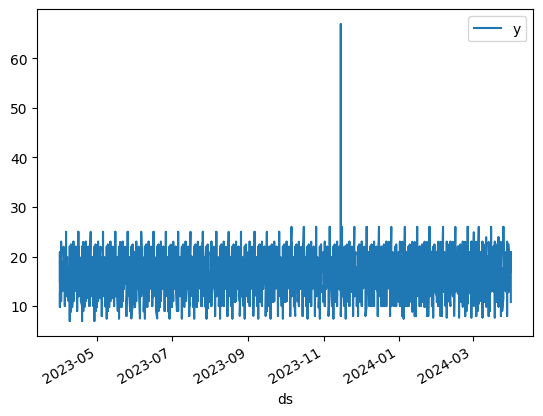

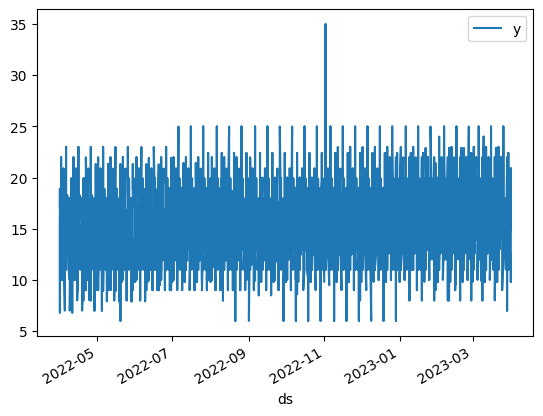

In [7]:
teste.plot(x='ds',y='y'), train.plot(x='ds',y='y')

In [8]:
df_p

,ds,y
0,2022-04-01,15.98
1,2022-04-01,6.80
2,2022-04-01,13.99
3,2022-04-01,15.19
4,2022-04-01,12.99
...,...,...
8324,2024-04-20,19.90
8325,2024-04-20,16.99
8326,2024-04-20,21.90
8327,2024-04-20,22.40


In [56]:
m = Prophet()
m.fit(train)

21:30:32 - cmdstanpy - INFO - Chain [1] start processing
21:30:32 - cmdstanpy - INFO - Chain [1] done processing


In [57]:
future = m.make_future_dataframe(periods=30)
future

,ds
0,2022-04-01
1,2022-04-02
2,2022-04-03
3,2022-04-04
4,2022-04-05
...,...
384,2023-04-27
385,2023-04-28
386,2023-04-29
387,2023-04-30


In [78]:
forecast = m.predict(future)
forecast.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
384,2023-04-27,16.247173,12.232175,20.572112,16.240426,16.253342,-0.014337,-0.014337,-0.014337,-0.014337,-0.014337,-0.014337,0.0,0.0,0.0,16.232837
385,2023-04-28,16.249766,11.980552,20.492221,16.242681,16.256526,0.103454,0.103454,0.103454,0.103454,0.103454,0.103454,0.0,0.0,0.0,16.353219
386,2023-04-29,16.252358,12.315052,20.362062,16.244927,16.259580,-0.018124,-0.018124,-0.018124,-0.018124,-0.018124,-0.018124,0.0,0.0,0.0,16.234235
387,2023-04-30,16.254951,12.356851,20.554610,16.247103,16.262719,-0.015327,-0.015327,-0.015327,-0.015327,-0.015327,-0.015327,0.0,0.0,0.0,16.239624
388,2023-05-01,16.257544,12.076232,20.349624,16.249333,16.265780,-0.023833,-0.023833,-0.023833,-0.023833,-0.023833,-0.023833,0.0,0.0,0.0,16.233711


<Axes: xlabel='ds'>

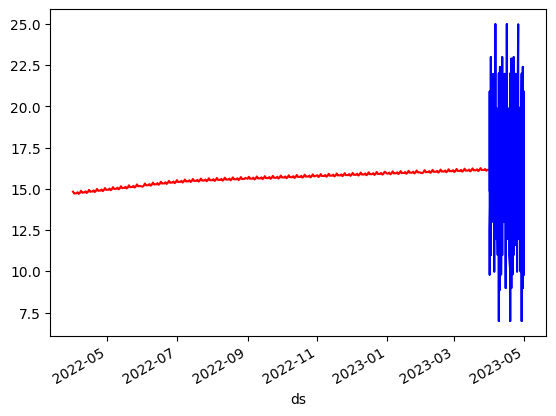

In [77]:
forecast.set_index("ds")['yhat'].plot(color='red')
teste[teste['ds']<=pd.Timestamp('2023-05-01')].set_index('ds')["y"].plot(color="blue")

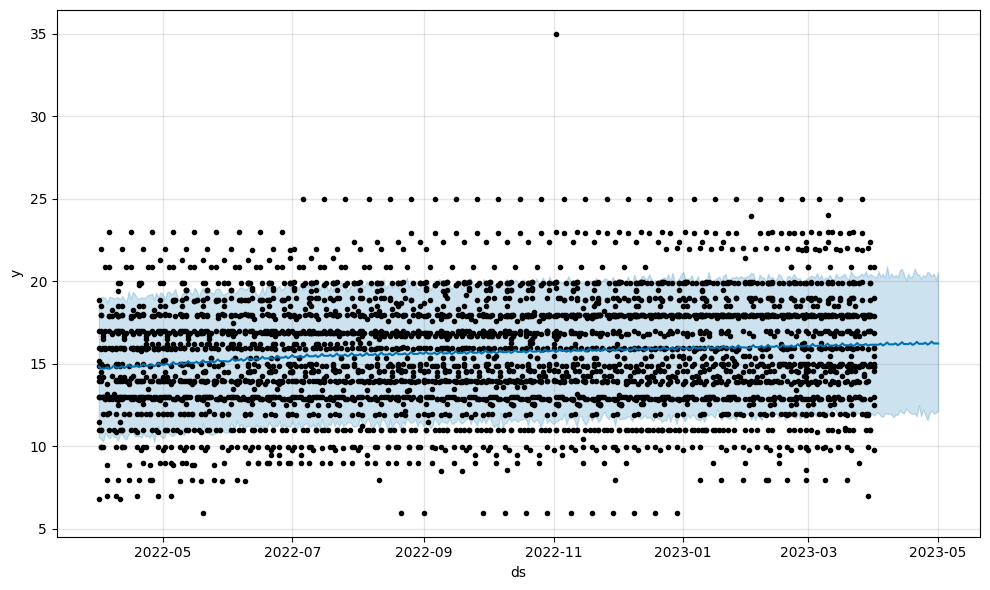

In [59]:
fig1 = m.plot(forecast)

In [60]:
plot_plotly(m, forecast)

In [61]:
plot_components_plotly(m, forecast)

In [51]:
df_cv = cross_validation(m, initial='90 days', horizon = '30 days')

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/43 [00:00<?, ?it/s]

21:16:13 - cmdstanpy - INFO - Chain [1] start processing
21:16:14 - cmdstanpy - INFO - Chain [1] done processing
21:16:14 - cmdstanpy - INFO - Chain [1] start processing
21:16:14 - cmdstanpy - INFO - Chain [1] done processing
21:16:15 - cmdstanpy - INFO - Chain [1] start processing
21:16:15 - cmdstanpy - INFO - Chain [1] done processing
21:16:15 - cmdstanpy - INFO - Chain [1] start processing
21:16:15 - cmdstanpy - INFO - Chain [1] done processing
21:16:16 - cmdstanpy - INFO - Chain [1] start processing
21:16:16 - cmdstanpy - INFO - Chain [1] done processing
21:16:16 - cmdstanpy - INFO - Chain [1] start processing
21:16:17 - cmdstanpy - INFO - Chain [1] done processing
21:16:17 - cmdstanpy - INFO - Chain [1] start processing
21:16:17 - cmdstanpy - INFO - Chain [1] done processing
21:16:18 - cmdstanpy - INFO - Chain [1] start processing
21:16:18 - cmdstanpy - INFO - Chain [1] done processing
21:16:19 - cmdstanpy - INFO - Chain [1] start processing
21:16:19 - cmdstanpy - INFO - Chain [1]

In [52]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-07-01,16.506225,12.416699,20.623903,9.80,2022-06-30
1,2022-07-01,16.506225,12.212094,20.468650,19.90,2022-06-30
2,2022-07-01,16.506225,12.421129,20.717131,14.59,2022-06-30
3,2022-07-01,16.506225,12.148565,20.888395,14.49,2022-06-30
4,2022-07-01,16.506225,12.392681,20.782967,13.00,2022-06-30


In [54]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,4 days,11.760512,3.429360,2.805507,0.195810,0.145582,0.179564,0.797929
1,5 days,12.409668,3.522736,2.858319,0.197282,0.146439,0.182148,0.785758
2,6 days,12.128990,3.482670,2.820032,0.191976,0.145904,0.178726,0.787431
3,7 days,11.935590,3.454792,2.786602,0.191217,0.146243,0.177012,0.796768
4,8 days,13.470946,3.670279,2.791360,0.192501,0.138773,0.177001,0.797666


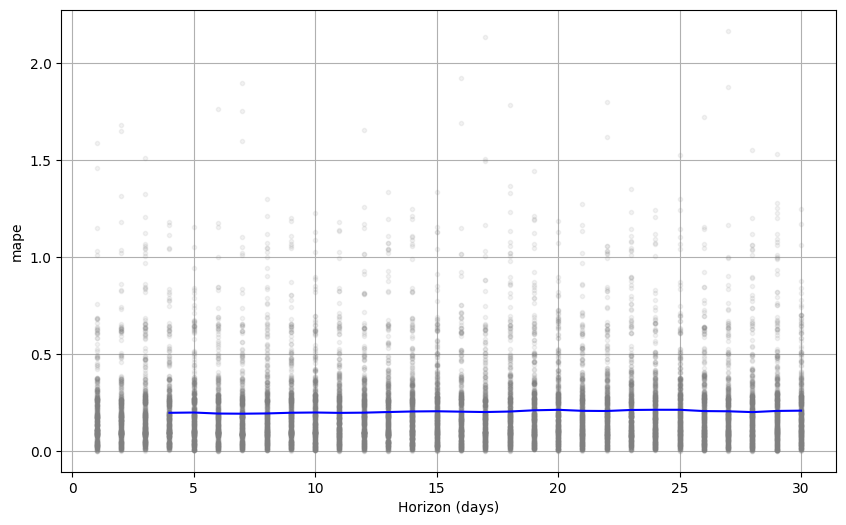

In [55]:
fig = plot_cross_validation_metric(df_cv, metric='mape')